# Gradient Descent Methods

This tour explores the use of gradient descent method for unconstrained and constrained optimization of a smooth function

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [1]:
library(imager)
library(png)
library(pracma)

options(warn=-1) # turns off warnings, to turn on: "options(warn=0)"

# Importing the libraries
for (f in list.files(path="nt_toolbox/toolbox_general/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_general/", f, sep=""))
}
for (f in list.files(path="nt_toolbox/toolbox_signal/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_signal/", f, sep=""))
}

Loading required package: plyr
Loading required package: magrittr

Attaching package: 'imager'

The following object is masked from 'package:magrittr':

    add

The following object is masked from 'package:plyr':

    liply

The following objects are masked from 'package:stats':

    convolve, spectrum

The following object is masked from 'package:graphics':

    frame

The following object is masked from 'package:base':

    save.image


Attaching package: 'pracma'

The following objects are masked from 'package:magrittr':

    and, mod, or


Attaching package: 'tuneR'

The following objects are masked from 'package:imager':

    channel, play


Attaching package: 'akima'

The following object is masked from 'package:imager':

    interp



## Gradient Descent for Unconstrained Problems

We consider the problem of finding a minimum of a function $f$, hence solving
$$\umin{x \in \RR^d} f(x)$$
where $f : \RR^d \rightarrow \RR$ is a smooth function.

Note that the minimum is not necessarily unique.
In the general case, $f$ might exhibit local minima, in which case the proposed algorithms is not expected to find a global minimizer of the problem.
In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes
$$ x^{(k+1)} = x^{(k)} - \tau_k \nabla f(x^{(k)}), $$
where $\tau_k>0$ is a step size, and $\nabla f(x) \in \RR^d$ is the gradient of $f$ at the point $x$, and $x^{(0)} \in \RR^d$ is any initial point.

In the convex case, if $f$ is of class $C^2$, in order to ensure convergence, the step size should satisfy
$$ 0 < \tau_k < \frac{2}{ \sup_x \norm{Hf(x)} } $$
where $Hf(x) \in \RR^{d \times d}$ is the Hessian of $f$ at $x$ and $\norm{\cdot}$ is the spectral operator norm (largest eigenvalue). 

## Gradient Descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} \pa{ x_1^2 + \eta x_2^2 } ,$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

In [2]:
eta = 10

Function $f$.

In [3]:
f = function(x){(x[1]**2 + eta * x[2]**2 ) / 2}

Background image of the function.

In [4]:
t = linspace(-.7,.7,101)
temp = meshgrid(t,t)
x = temp$X
y = temp$Y
F = ( x**2 + eta * y**2 ) / 2

Display the function as a 2-D image.

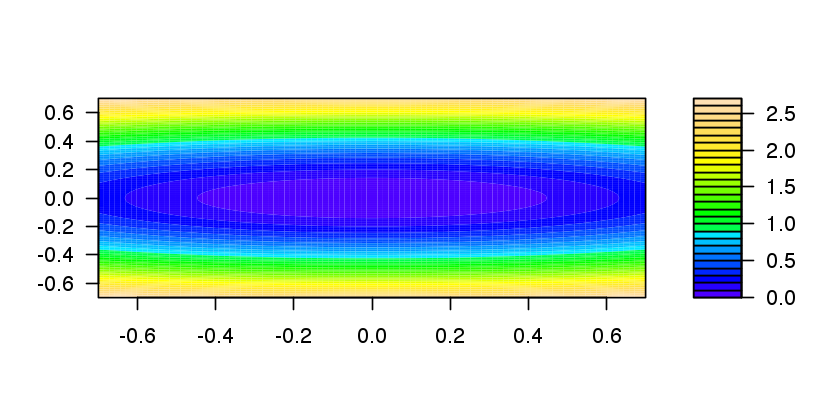

In [5]:
options(repr.plot.width=7, repr.plot.height=3.5)
filled.contour(t,t,t(F),nlevels=35, color.palette=topo.colors)

Gradient.

In [6]:
GradF = function(x) {c(x[1], eta*x[2])}

The step size should satisfy $\tau_k < 2/\eta$.
We use here a constant step size.

In [7]:
tau = 1.8/eta

__Exercise 1__

Perform the gradient descent using a fixed step size $\tau_k=\tau$.
Display the decay of the energy $f(x^{(k)})$ through the iteration.
Save the iterates so that |X(:,k)| corresponds to $x^{(k)}$.

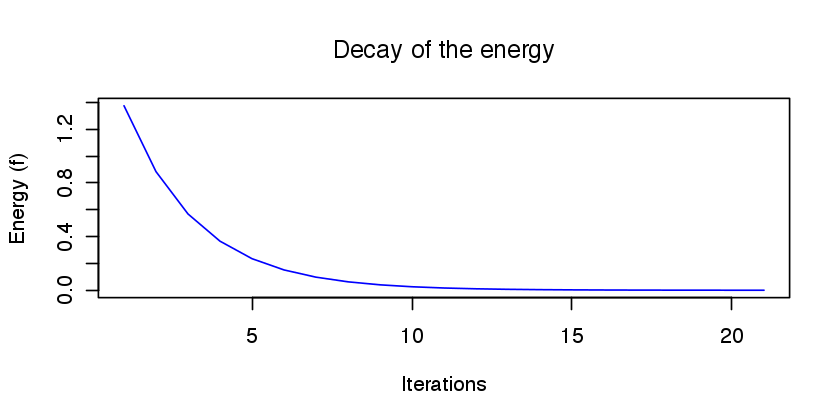

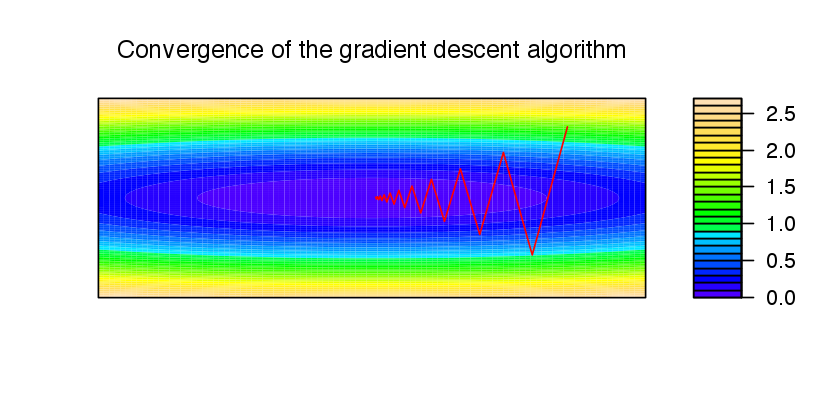

In [8]:
source("nt_solutions/optim_1_gradient_descent/exo1.R")

In [9]:
# Insert code here.

Display the iterations.

In [10]:
# Insert code here.

__Exercise 2__

Display the iteration for several different step sizes.

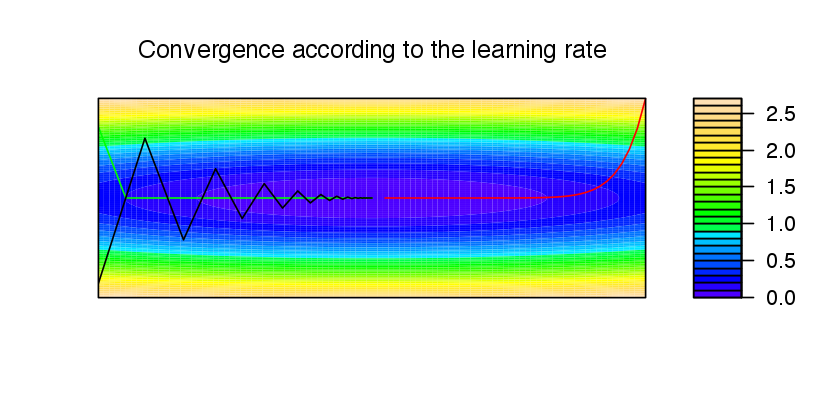

In [11]:
source("nt_solutions/optim_1_gradient_descent/exo2.R")

In [12]:
# Insert code here.

## Gradient and Divergence of Images

Local differential operators like gradient, divergence and laplacian are the building blocks for variational image processing.

Load an image $x_0 \in \RR^N$ of $N=n \times n$ pixels.

In [13]:
n = 256
name = 'nt_toolbox/data/lena.png'
x0 = load_image(name, n)

Display it.

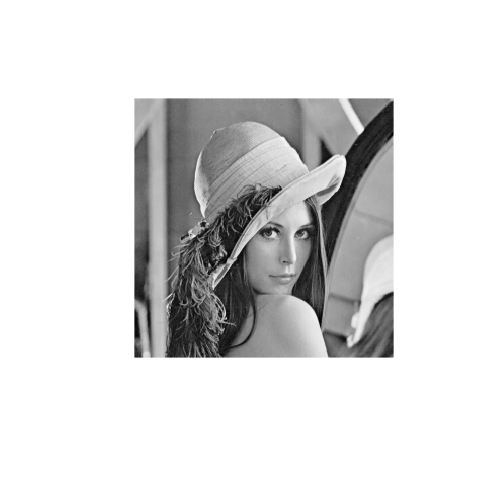

In [14]:
options(repr.plot.width=4, repr.plot.height=4)
imageplot(x0)

For a continuous function $g$, the gradient reads
$$\nabla g(s) = \pa{ \pd{g(s)}{s_1}, \pd{g(s)}{s_2} } \in \RR^2.$$
(note that here, the variable $d$ denotes the 2-D spacial position).

We discretize this differential operator on a discrete image $x \in \RR^N$ using first order finite differences. 
$$(\nabla x)_i = ( x_{i_1,i_2}-x_{i_1-1,i_2}, x_{i_1,i_2}-x_{i_1,i_2-1} ) \in \RR^2.$$
Note that for simplity we use periodic boundary conditions.

Compute its gradient, using finite differences.

In [15]:
grad = function(x){
    n = dim(x)[1]
    hdiff = x[,] - x[c(n, 1:n-1),]
    vdiff = x[,] - x[,c(n, 1:n-1)]
    return (array(c(hdiff, vdiff), dim=c(n, n, 2)))
}

One thus has $\nabla : \RR^N \mapsto \RR^{N \times 2}.$

In [16]:
v = grad(x0)

One can display each of its components.

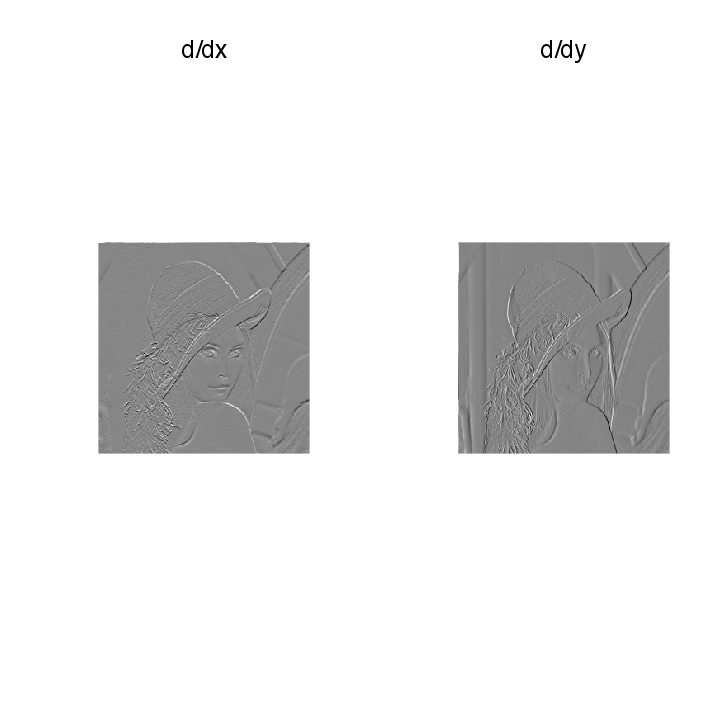

In [17]:
options(repr.plot.width=6, repr.plot.height=6)
imageplot(v[,,1], 'd/dx', c(1,2,1))
imageplot(v[,,2], 'd/dy', c(1,2,2))

One can display its magnitude $\norm{(\nabla x)_i}$, which is large near edges.

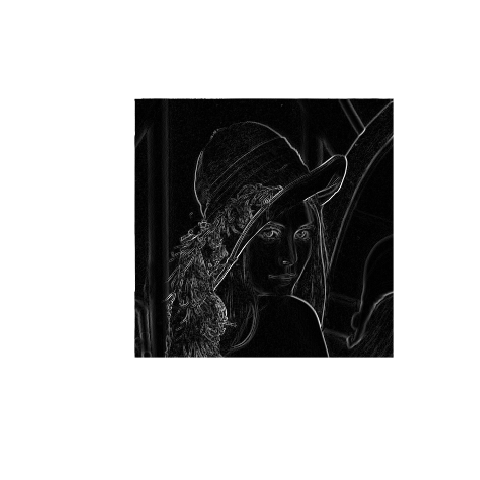

In [18]:
options(repr.plot.width=4, repr.plot.height=4)
imageplot(sqrt((v * v)[, , 1] + (v * v)[, , 2]))

The divergence operator maps vector field to images. 
For continuous vector fields $((v(s) \in \RR^2)$, it is defined as
$$\text{div}(v)(s) = \pd{v_1(s)}{s_1} +  \pd{v_2(s)}{s_2} \in \RR.$$
(note that here, the variable \(s\) denotes the 2-D spacial position).
It is minus the adjoint of the gadient, i.e. $\text{div} = - \nabla^*$.

It is discretized, for $v=(v^1,v^2)$ as
$$\text{div}(v)_i = v^1_{i_1+1,i_2} - v^1_{i_1,i_2} + v^2_{i_1,i_2+1} - v^2_{i_1,i_2} .$$

In [19]:
div = function(x)
{
    n = dim(x)[1]
    hdiff1 = x[c(2:n, 1), , 1]
    hdiff2 = x[, c(2:n, 1), 2]
    return(hdiff1 - x[,,1] + hdiff2 - x[,,2])
}

The Laplacian operatore is defined as $\Delta=\text{div} \circ  \nabla = -\nabla^* \circ \nabla$.
It is thus a negative symmetric operator.

In [20]:
delta = function(x)
{
    return (div(grad(x)))
}

Display $\Delta x_0$.

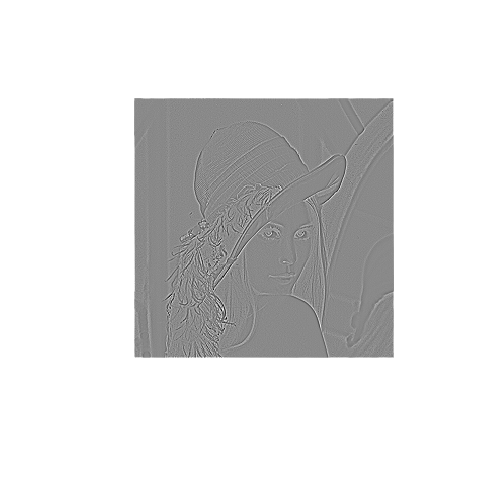

In [21]:
imageplot(delta(x0))

Check that the relation $\norm{\nabla x} = - \dotp{\Delta x}{x}.$

In [22]:
print(paste("Should be 0 and it is equal to :", sum((grad(x0) * grad(x0))) + sum(delta(x0) * x0[,]), sep=" "))

[1] "Should be 0 and it is equal to : 0"


## Gradient Descent in Image Processing

We consider now the problem of denoising an image $y \in \RR^d$ where $d = n \times n$ is the number of pixels ($n$ being the number of rows/columns in the image).

Add noise to the original image, to simulate a noisy image.

In [23]:
sigma = 0.1
n = dim(x0)[1]
y = x0[,] + sigma * matrix( rnorm(n * n,mean=0,sd=1), n, n) 

Display the noisy image $y$.

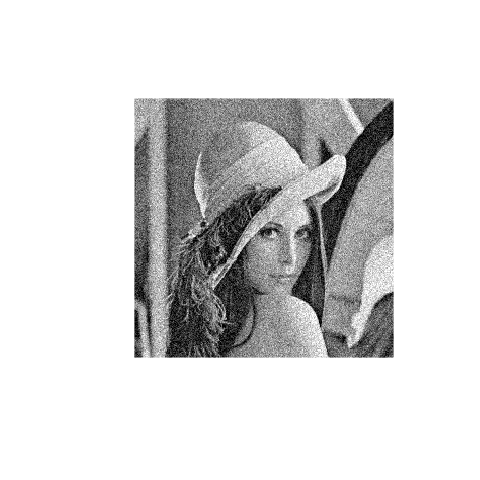

In [24]:
imageplot(clamp(y))

Denoising is obtained by minimizing the following functional
$$\umin{x \in \RR^d} f(x) = \frac{1}{2} \norm{y-x}^2 + \la J_\epsilon(x)$$
where $J_\epsilon(x)$ is a smoothed total variation of the image.
$$J_\epsilon(x) = \sum_i \norm{ (G x)_i }_{\epsilon}$$
where $(Gx)_i \in \RR^2$ is an approximation of the gradient of $x$ at pixel $i$ and for $u \in \RR^2$, we use the following smoothing of the $L^2$ norm in $\RR^2$
$$\norm{u}_\epsilon = \sqrt{ \epsilon^2 + \norm{u}^2 },$$
for a small value of $\epsilon>0$.

The gradient of the functional read
$$\nabla f(x) = x-y + \lambda \nabla J_\epsilon(x)$$
where the gradient of the smoothed TV norm is
$$\nabla J_\epsilon(x)_i = G^*( u ) \qwhereq u_i = \frac{ (G x)_i }{\norm{ (G x)_i }_\epsilon} $$
where $G^*$ is the adjoint operator of $G$ which corresponds to minus a discretized divergence

Value for $\lambda$.

In [25]:
la = 8

Value for $\epsilon$.

In [26]:
epsilon = 1e-3

TV norm.

In [27]:
norm_eps = function(u, epsilon){sqrt(epsilon^2 + sum(u * u))}
J = function(x, epsilon){norm_eps(grad(x), epsilon)}

Function $f$ to minimize.

In [28]:
f = function(x, y, epsilon){1/2 * norm(x - y)**2 + la * J(x, epsilon)}

Gradient of $J_\epsilon$. Note that |div| implement $-G^*$.

In [29]:
normalize_vec = function(u, epsilon)
    {
    denom = c()
    n = dim(u)[3]
    for (i in 1:n)
    {
        denom = norm_eps(u[,,i], epsilon)
    }
    return (u / denom)
    }
GradTV = function(x, epsilon){- div(normalize_vec(grad(x), epsilon))}

Gradient of the functional.

In [30]:
Gradf = function(x, y, epsilon){x - y + la * GradTV(x, epsilon)}

The step size should satisfy
$$0 < \tau_k < \frac{2}{ 1 + 4 \lambda / \epsilon }.$$
Here we use a slightly larger step size, which still work in practice.

In [31]:
tau = 1.8 / ( 1 + la*8/epsilon )
tau = tau*4

__Exercice 3:__

Implement the gradient descent. Monitor the decay of $f$ through the iterations.

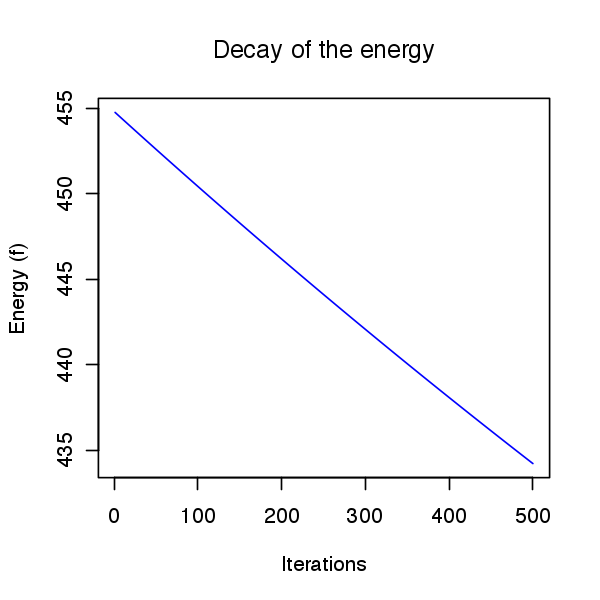

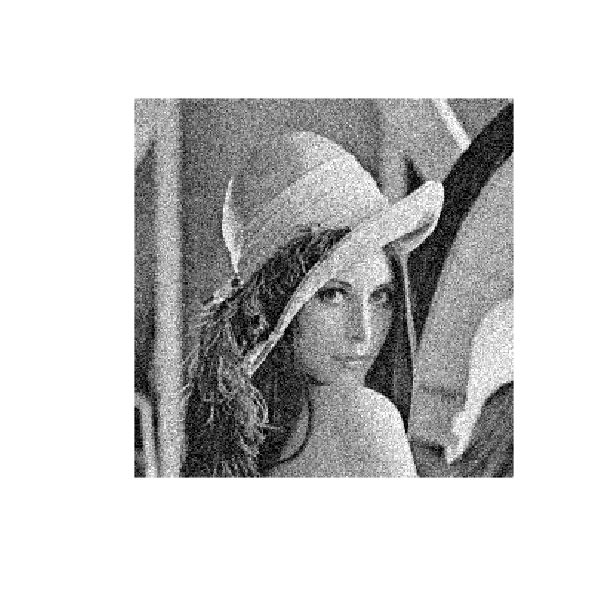

In [32]:
source("nt_solutions/optim_1_gradient_descent/exo3.R")

In [33]:
## Insert your code here.

Display the resulting denoised image.

In [34]:
#imageplot(clamp(x))

## Constrained Optimization Using Projected Gradient Descent

We consider a linear imaging operator $\Phi : x \mapsto \Phi(x)$ that maps high resolution images to low dimensional observations.
Here we consider a pixel masking operator, that is diagonal over the spacial domain.

To emphasis the effect of the TV functional, we use a simple geometric image.

In [35]:
n = 64
radius = 0.6
t = linspace(-1,1,n)
Y = meshgrid(t,t)$Y
X = meshgrid(t,t)$X
x0 = (pmax(abs(X),abs(Y) ) < radius) * 1.0

We consider here the inpainting problem.
This simply corresponds to a masking operator.
Here we remove the central part of the image.

In [36]:
a = 4
Lambda = matrix(1, n, n)
Lambda[((n/2) - a):((n/2) + a),] = 0

Masking operator $\Phi$.
Note that it is symmetric, i.e. $\Phi^*=\Phi$.

In [37]:
Phi  = function(x){x * Lambda}
PhiS = Phi

Noiseless observations $y=\Phi x_0$.

In [38]:
y = Phi(x0)

Display.

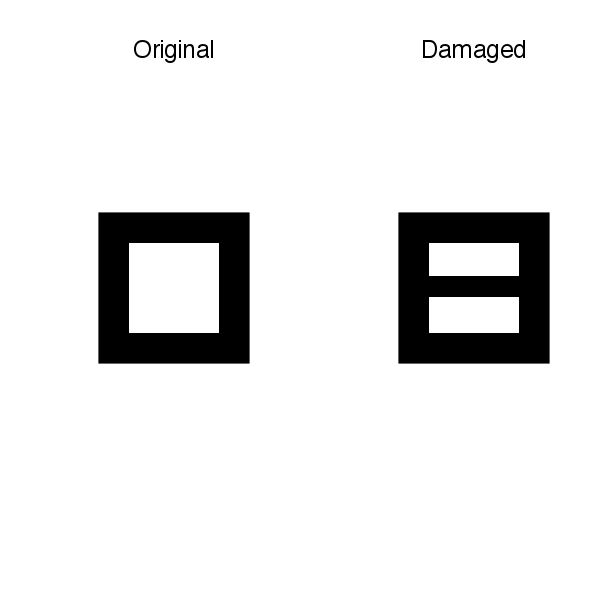

In [39]:
imageplot(x0, 'Original', c(1,2,1))
imageplot(y, 'Damaged', c(1,2,2))

We want to solve the noiseless inverse problem $y=\Phi f$ using a total variation regularization:
$$\umin{ y=\Phi x } J_\epsilon(x).$$
We use the following projected gradient descent
$$x^{(k+1)} = \text{Proj}_{\Hh}( x^{(k)} - \tau_k \nabla J_{\epsilon}(x^{(k)}) )$$
where $\text{Proj}_{\Hh}$ is the orthogonal projection on the set of linear constraint $\Phi x = y$, and is easy to compute for inpainting

In [40]:
ProjH = function(x){ x + PhiS( y - Phi(x) )}

__Exercice 4:__

Display the evolution of the inpainting process.

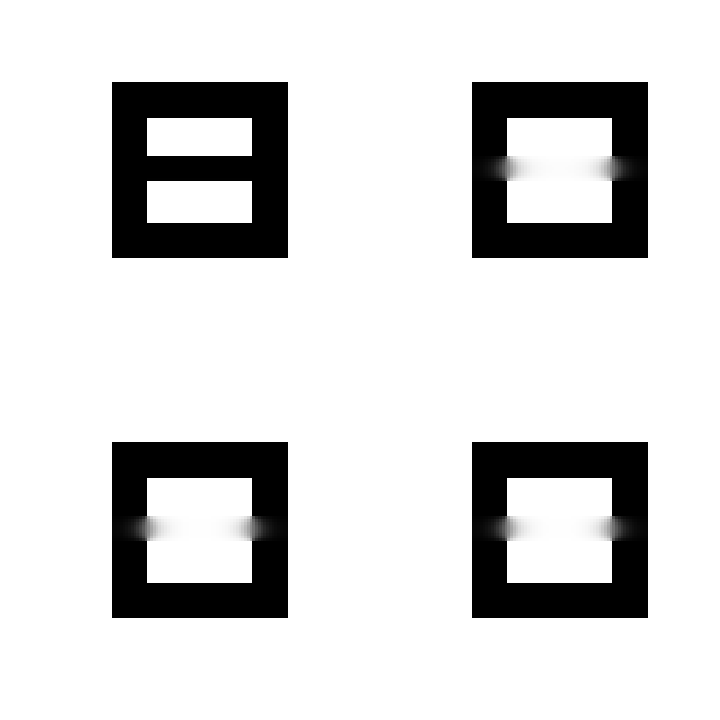

In [41]:
source("nt_solutions/optim_1_gradient_descent/exo4.R")

In [42]:
## Insert your code here.

__Exercice 5:__

Try with several values of $\epsilon$.

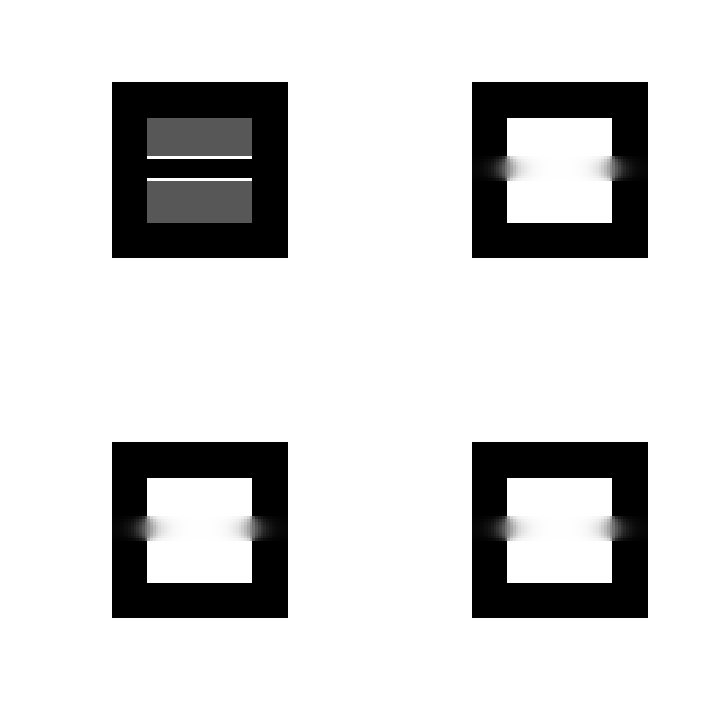

In [43]:
source("nt_solutions/optim_1_gradient_descent/exo5.R")

In [44]:
## Insert your code here.